In [2]:
#Import Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [3]:
# Loading csv file 'music.csv' as a pandas Dataframe
music_data = pd.read_csv('music.csv')
music_data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [4]:
#The isnull() method returns a DataFrame object where all the values are replaced with a Boolean value True for NULL values,
# and otherwise False.

# determines sum of the Null values  for each column.
music_data.isnull().sum()

age       0
gender    0
genre     0
dtype: int64

In [5]:
# drops a rows whose all data is missing or contain null values
music_data.dropna()

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


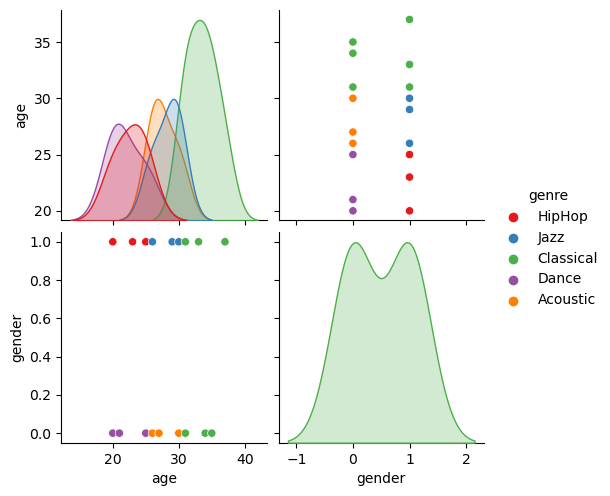

In [6]:
#The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset.
sns.pairplot(music_data, hue = 'genre', palette ='Set1' )

In [7]:

#split the dataset into X and y:

#X is input set
X = music_data.drop(columns=['genre'])
#y is output set
y = music_data['genre']


In [8]:
# Initialize our classifier
dtree = DecisionTreeClassifier()
# Train our classifier
dtree.fit(X,y)
# Make predictions
predictions = dtree.predict([[24,0],[27,1]])
#our model successfully make predictions,
#however, we need to also measure accuracy and if it is not enough, we need to use the different algorithms
predictions

array(['Dance', 'Jazz'], dtype=object)

In [22]:
#Split the data into train and test sets
#We allocate the 20% of the data for testing

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [23]:
dtree = DecisionTreeClassifier()
#instead of passing entire dataset we pass only train dataset
dtree.fit(X_train,y_train)
#instead of passing above 2 samples, we pass X_test(input values for testing)
predictions = dtree.predict(X_test)

In [24]:
#for the accuracy score we compare actual values in the test set(y_test) with predictions
score = accuracy_score(y_test, predictions)
score

1.0

In [25]:
# Logistic regression
#Logistic regression aims to solve classification problems. 
#It does this by predicting categorical outcomes, unlike linear regression that predicts a continuous outcome. 

logreg = LogisticRegression()

#The 'fit' method trains the algorithm on the training data, after the model is initialized. 
logreg.fit(X_train, y_train)

#predict() function enables us to predict the labels of the data values on the basis of the trained model
predictions = dtree.predict(X_test)

# calculates the accuracy score
score = accuracy_score(y_test, predictions)

print('accuracy score:', score)

#A classification report is a performance evaluation report,
#that is used to evaluate the performance of machine learning models by the following 5 criteria:

#Accuracy is a score used to evaluate the model’s performance. The higher it is, the better.
#Recall measures the model’s ability to correctly predict the true positive values.
#Precision is the ratio of true positives to the sum of both true and false positives.
#F-score combines precision and recall into one metric. Ideally, its value should be closest to 1, the better.
#Support is the number of actual occurrences of each class in the dataset.
print(classification_report(y_test,predictions))

#The confusion matrix is used to evaluate the accuracy of a machine learning model that tries to predict classes
print(confusion_matrix(y_test,predictions))

accuracy score: 1.0
              precision    recall  f1-score   support

   Classical       1.00      1.00      1.00         1
       Dance       1.00      1.00      1.00         1
      HipHop       1.00      1.00      1.00         1
        Jazz       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


In [26]:
# KNN
#The KNN algorithm is a supervised machine learning model. 
#That means it predicts a target variable using one or multiple independent variables.

knn = KNeighborsClassifier()

#The 'fit' method trains the algorithm on the training data, after the model is initialized. 
knn.fit(X_train, y_train)

#predict() function enables us to predict the labels of the data values on the basis of the trained model
predictions = dtree.predict(X_test)

# calculates the accuracy score
score = accuracy_score(y_test, predictions)

print('accuracy score:', score)

#A classification report is a performance evaluation report,
#that is used to evaluate the performance of machine learning models by the following 5 criteria:

#Accuracy is a score used to evaluate the model’s performance. The higher it is, the better.
#Recall measures the model’s ability to correctly predict the true positive values.
#Precision is the ratio of true positives to the sum of both true and false positives.
#F-score combines precision and recall into one metric. Ideally, its value should be closest to 1, the better.
#Support is the number of actual occurrences of each class in the dataset.
print(classification_report(y_test,predictions))

#The confusion matrix is used to evaluate the accuracy of a machine learning model that tries to predict classes
print(confusion_matrix(y_test,predictions))

accuracy score: 1.0
              precision    recall  f1-score   support

   Classical       1.00      1.00      1.00         1
       Dance       1.00      1.00      1.00         1
      HipHop       1.00      1.00      1.00         1
        Jazz       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


In [27]:
#RandomForestClassifier
#The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set.

rfc = RandomForestClassifier()

#The 'fit' method trains the algorithm on the training data, after the model is initialized. 
rfc.fit(X_train, y_train)

#predict() function enables us to predict the labels of the data values on the basis of the trained model
predictions = dtree.predict(X_test)

# calculates the accuracy score
score = accuracy_score(y_test, predictions)

print('accuracy score:', score)

#A classification report is a performance evaluation report,
#that is used to evaluate the performance of machine learning models by the following 5 criteria:

#Accuracy is a score used to evaluate the model’s performance. The higher it is, the better.
#Recall measures the model’s ability to correctly predict the true positive values.
#Precision is the ratio of true positives to the sum of both true and false positives.
#F-score combines precision and recall into one metric. Ideally, its value should be closest to 1, the better.
#Support is the number of actual occurrences of each class in the dataset.
print(classification_report(y_test,predictions))

#The confusion matrix is used to evaluate the accuracy of a machine learning model that tries to predict classes
print(confusion_matrix(y_test,predictions))

accuracy score: 1.0
              precision    recall  f1-score   support

   Classical       1.00      1.00      1.00         1
       Dance       1.00      1.00      1.00         1
      HipHop       1.00      1.00      1.00         1
        Jazz       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


In [28]:
#Decision Tree Classifier
#Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression.

dtree = DecisionTreeClassifier()

#The 'fit' method trains the algorithm on the training data, after the model is initialized. 
dtree.fit(X_train, y_train)

#predict() function enables us to predict the labels of the data values on the basis of the trained model
predictions = dtree.predict(X_test)

# calculates the accuracy score
score = accuracy_score(y_test, predictions)

print('accuracy score:', score)

#A classification report is a performance evaluation report,
#that is used to evaluate the performance of machine learning models by the following 5 criteria:

#Accuracy is a score used to evaluate the model’s performance. The higher it is, the better.
#Recall measures the model’s ability to correctly predict the true positive values.
#Precision is the ratio of true positives to the sum of both true and false positives.
#F-score combines precision and recall into one metric. Ideally, its value should be closest to 1, the better.
#Support is the number of actual occurrences of each class in the dataset.
print(classification_report(y_test,predictions))

#The confusion matrix is used to evaluate the accuracy of a machine learning model that tries to predict classes
print(confusion_matrix(y_test,predictions))

accuracy score: 1.0
              precision    recall  f1-score   support

   Classical       1.00      1.00      1.00         1
       Dance       1.00      1.00      1.00         1
      HipHop       1.00      1.00      1.00         1
        Jazz       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


In [29]:
# Loading csv file 'diabetes.csv' as a pandas Dataframe

diabetes_data = pd.read_csv('diabetes.csv')

In [30]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [31]:
# determines sum of the Null values  for each column.
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [32]:
# drops a rows whose all data is missing or contain null values
diabetes_data.dropna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


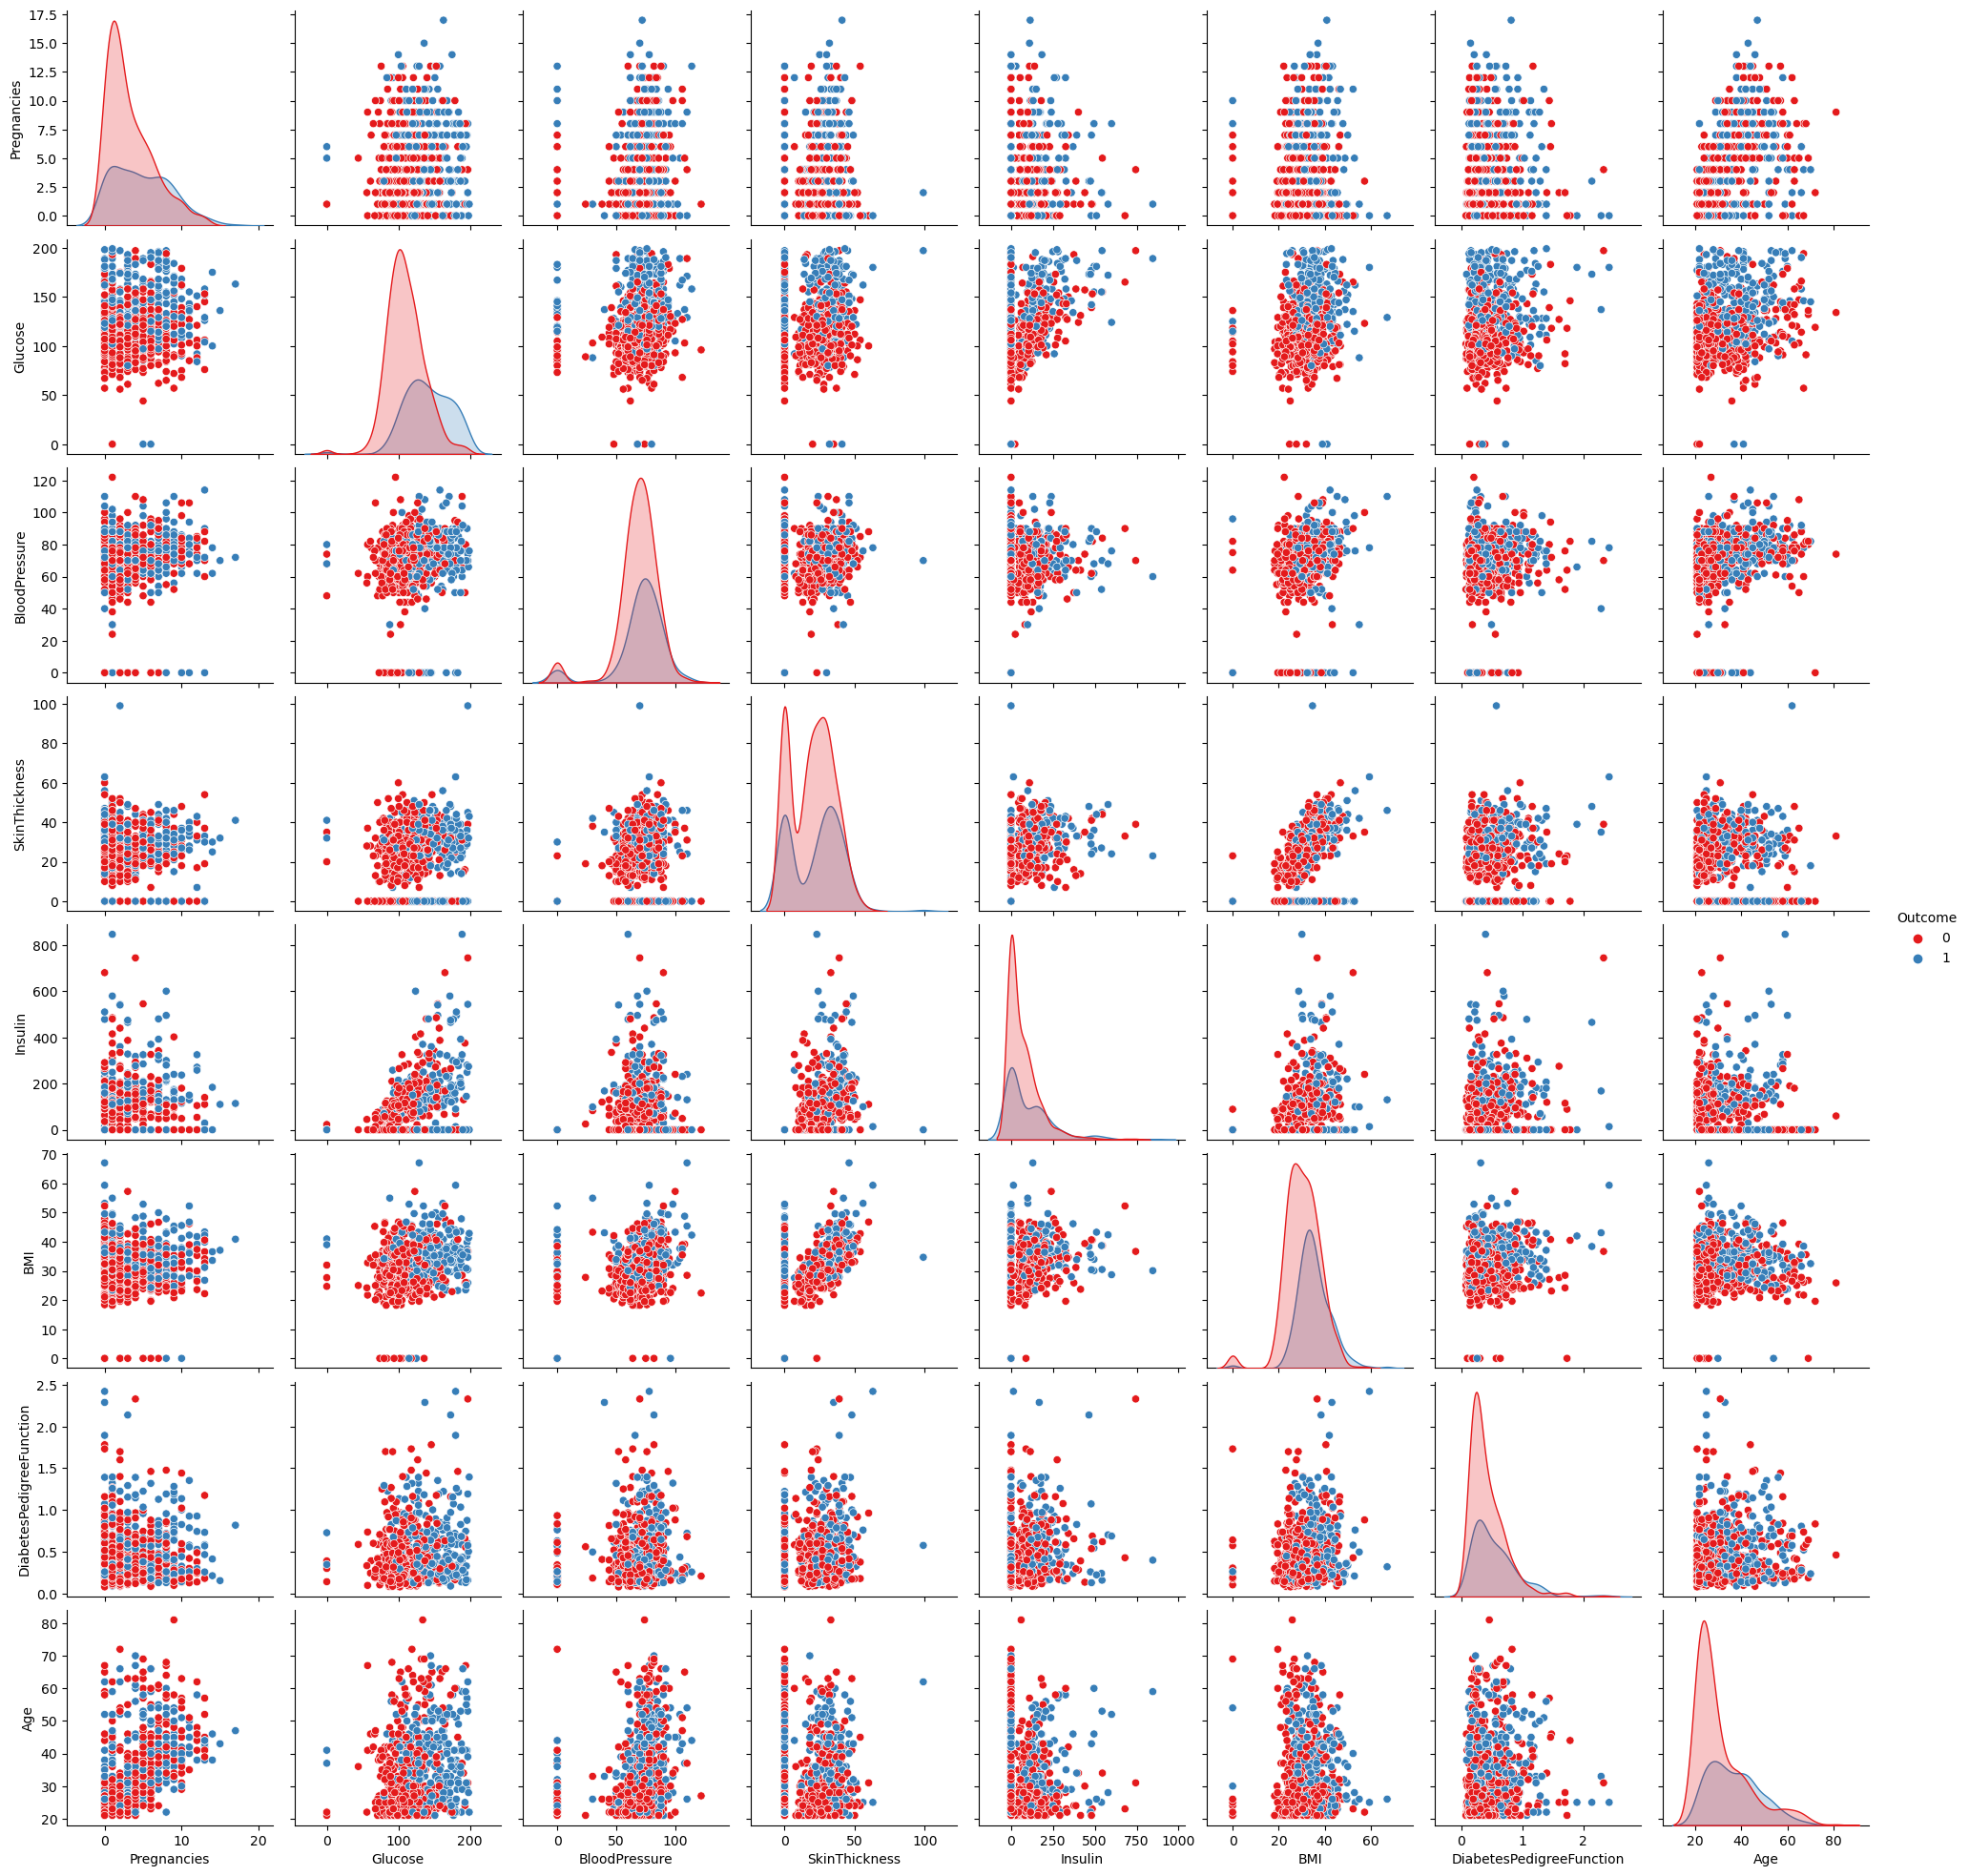

In [33]:
#The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset.
sns.pairplot(diabetes_data, hue = 'Outcome', palette ='Set1' )

In [34]:
#Build the Model
#split the dataset into X and y:

#X is input
X = diabetes_data.drop(columns=['Outcome'])
#y is output
y = diabetes_data['Outcome']

#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [35]:
# Logistic regression
#Logistic regression aims to solve classification problems. 
#It does this by predicting categorical outcomes, unlike linear regression that predicts a continuous outcome.

logreg = LogisticRegression()

#The 'fit' method trains the algorithm on the training data, after the model is initialized. 

logreg.fit(X_train, y_train)

# calculates the accuracy score for train data
train_score_acc = logreg.score(X_train, y_train)

# calculates the accuracy score for test data
test_score_acc = logreg.score(X_test, y_test)

print('train score accuracy:', train_score_acc)
print('test score accuracy:', test_score_acc)

#predict() function enables us to predict the labels of the data values on the basis of the trained model
predictions = logreg.predict(X_test) 

#A classification report is a performance evaluation report,
#that is used to evaluate the performance of machine learning models by the following 5 criteria:

#Accuracy is a score used to evaluate the model’s performance. The higher it is, the better.
#Recall measures the model’s ability to correctly predict the true positive values.
#Precision is the ratio of true positives to the sum of both true and false positives.
#F-score combines precision and recall into one metric. Ideally, its value should be closest to 1, the better.
#Support is the number of actual occurrences of each class in the dataset.
print(classification_report(y_test, predictions))

#The confusion matrix is used to evaluate the accuracy of a machine learning model that tries to predict classes
print(confusion_matrix(y_test, predictions))

train score accuracy: 0.7833876221498371
test score accuracy: 0.7662337662337663
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       101
           1       0.73      0.51      0.60        53

    accuracy                           0.77       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.76      0.77      0.75       154

[[91 10]
 [26 27]]


In [36]:
# KNN
#The KNN algorithm is a supervised machine learning model. 
#That means it predicts a target variable using one or multiple independent variables.

knn = KNeighborsClassifier()

#The 'fit' method trains the algorithm on the training data, after the model is initialized. 

knn.fit(X_train, y_train)

# calculates the accuracy score for train data
train_score_acc = knn.score(X_train, y_train)

# calculates the accuracy score for test data
test_score_acc = knn.score(X_test, y_test)

print('train score accuracy:', train_score_acc)
print('test score accuracy:', test_score_acc)

#predict() function enables us to predict the labels of the data values on the basis of the trained model
predictions = knn.predict(X_test) 

#A classification report is a performance evaluation report,
#that is used to evaluate the performance of machine learning models by the following 5 criteria:

#Accuracy is a score used to evaluate the model’s performance. The higher it is, the better.
#Recall measures the model’s ability to correctly predict the true positive values.
#Precision is the ratio of true positives to the sum of both true and false positives.
#F-score combines precision and recall into one metric. Ideally, its value should be closest to 1, the better.
#Support is the number of actual occurrences of each class in the dataset.
print(classification_report(y_test, predictions))

#The confusion matrix is used to evaluate the accuracy of a machine learning model that tries to predict classes
print(confusion_matrix(y_test, predictions))

train score accuracy: 0.7899022801302932
test score accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       101
           1       0.69      0.51      0.59        53

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154

[[89 12]
 [26 27]]


In [37]:
#Decision Tree Classifier
#Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression.

dtree = DecisionTreeClassifier()

#The 'fit' method trains the algorithm on the training data, after the model is initialized. 

dtree.fit(X_train, y_train)

# calculates the accuracy score for train data
train_score_acc = dtree.score(X_train, y_train)

# calculates the accuracy score for test data
test_score_acc = dtree.score(X_test, y_test)

print('train score accuracy:', train_score_acc)
print('test score accuracy:', test_score_acc)

#predict() function enables us to predict the labels of the data values on the basis of the trained model
predictions = dtree.predict(X_test) 

#A classification report is a performance evaluation report,
#that is used to evaluate the performance of machine learning models by the following 5 criteria:

#Accuracy is a score used to evaluate the model’s performance. The higher it is, the better.
#Recall measures the model’s ability to correctly predict the true positive values.
#Precision is the ratio of true positives to the sum of both true and false positives.
#F-score combines precision and recall into one metric. Ideally, its value should be closest to 1, the better.
#Support is the number of actual occurrences of each class in the dataset.
print(classification_report(y_test, predictions))

#The confusion matrix is used to evaluate the accuracy of a machine learning model that tries to predict classes
print(confusion_matrix(y_test, predictions))

train score accuracy: 1.0
test score accuracy: 0.6688311688311688
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       101
           1       0.52      0.49      0.50        53

    accuracy                           0.67       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.66      0.67      0.67       154

[[77 24]
 [27 26]]


In [38]:
#RandomForestClassifier
#The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set.

rfc = RandomForestClassifier()

#The 'fit' method trains the algorithm on the training data, after the model is initialized. 

rfc.fit(X_train, y_train)

# calculates the accuracy score for train data
train_score_acc = rfc.score(X_train, y_train)

# calculates the accuracy score for test data
test_score_acc = rfc.score(X_test, y_test)

print('train score accuracy:', train_score_acc)
print('test score accuracy:', test_score_acc)
#predict() function enables us to predict the labels of the data values on the basis of the trained model
predictions = rfc.predict(X_test) 

#A classification report is a performance evaluation report,
#that is used to evaluate the performance of machine learning models by the following 5 criteria:

#Accuracy is a score used to evaluate the model’s performance. The higher it is, the better.
#Recall measures the model’s ability to correctly predict the true positive values.
#Precision is the ratio of true positives to the sum of both true and false positives.
#F-score combines precision and recall into one metric. Ideally, its value should be closest to 1, the better.
#Support is the number of actual occurrences of each class in the dataset.
print(classification_report(y_test, predictions))

#The confusion matrix is used to evaluate the accuracy of a machine learning model that tries to predict classes
print(confusion_matrix(y_test, predictions))

train score accuracy: 1.0
test score accuracy: 0.7337662337662337
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       101
           1       0.65      0.49      0.56        53

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154

[[87 14]
 [27 26]]


In [39]:
#MultinomialNB
#The Multinomial Naive Bayes algorithm is a Bayesian learning approach popular in Natural Language Processing (NLP)

nb = MultinomialNB()

#The 'fit' method trains the algorithm on the training data, after the model is initialized. 

nb.fit(X_train, y_train)

# calculates the accuracy score for train data
train_score_acc = nb.score(X_train, y_train)

# calculates the accuracy score for test data
test_score_acc = nb.score(X_test, y_test)

print('train score accuracy:', train_score_acc)
print('test score accuracy:', test_score_acc)

#predict() function enables us to predict the labels of the data values on the basis of the trained model
predictions = nb.predict(X_test) 

#A classification report is a performance evaluation report,
#that is used to evaluate the performance of machine learning models by the following 5 criteria:

#Accuracy is a score used to evaluate the model’s performance. The higher it is, the better.
#Recall measures the model’s ability to correctly predict the true positive values.
#Precision is the ratio of true positives to the sum of both true and false positives.
#F-score combines precision and recall into one metric. Ideally, its value should be closest to 1, the better.
#Support is the number of actual occurrences of each class in the dataset.
print(classification_report(y_test, predictions))

#The confusion matrix is used to evaluate the accuracy of a machine learning model that tries to predict classes
print(confusion_matrix(y_test, predictions))

train score accuracy: 0.6026058631921825
test score accuracy: 0.6103896103896104
              precision    recall  f1-score   support

           0       0.73      0.64      0.68       101
           1       0.45      0.55      0.49        53

    accuracy                           0.61       154
   macro avg       0.59      0.60      0.59       154
weighted avg       0.63      0.61      0.62       154

[[65 36]
 [24 29]]


In [40]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

#The 'fit' method trains the algorithm on the training data, after the model is initialized.
lm.fit(X_train, y_train)

LinearRegression()

In [41]:
#The value of 𝑏₀, also called the intercept, shows the point where the estimated regression line crosses the 𝑦 axis.
print(lm.intercept_)

-0.8519042746113612


In [42]:
#coef_ − array, shape(n_features,) or (n_targets, n_features)
#It is used to estimate the coefficients for the linear regression problem.
lm.coef_

array([ 1.98184615e-02,  6.30792666e-03, -2.60189178e-03, -1.01808233e-04,
       -2.81084496e-04,  1.35584375e-02,  1.49209173e-01,  1.76983020e-03])

In [43]:
#Displays columns of train dataset
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [44]:
#DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.
cdf = pd.DataFrame(lm.coef_, X.columns,columns=['Coeff'])
cdf

,Coeff
Pregnancies,0.019818
Glucose,0.006308
BloodPressure,-0.002602
SkinThickness,-0.000102
Insulin,-0.000281
BMI,0.013558
DiabetesPedigreeFunction,0.149209
Age,0.001770


In [45]:
#predict() function enables us to predict the labels of the data values on the basis of the trained model
predictions = lm.predict(X_test).astype(int)

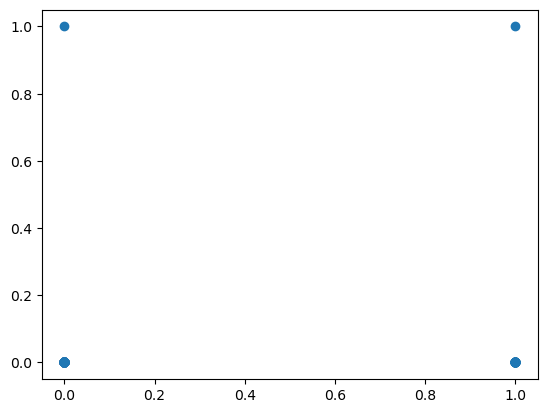

In [46]:
#We can use scatter plots to explore the relationship between two variables
plt.scatter(y_test, predictions)

In [47]:
#DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.
result = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
result

,Actual,Predicted
360,1,0
716,1,0
591,0,0
519,0,0
258,0,0
...,...,...
180,0,0
594,0,0
659,1,0
288,0,0


In [48]:
from sklearn import metrics
#calculates the mean absolute error of the given arrays
metrics.mean_absolute_error(y_test, predictions)

0.34415584415584416

In [49]:
# Loading cvs file 'breast-cancer' as a pandas Dataframe
breast_cancer = pd.read_csv('breast-cancer.csv')

In [50]:
breast_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [51]:
# determines sum of the Null values  for each column.
breast_cancer.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [52]:
# drops a rows whose all data is missing or contain null values
breast_cancer.dropna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [53]:
#Build the Model
#split the dataset into X and y:
# X is input
X = breast_cancer.drop(columns=['diagnosis'])
# y is output
y = breast_cancer['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [54]:
# Logistic regression
#Logistic regression aims to solve classification problems. 
#It does this by predicting categorical outcomes, unlike linear regression that predicts a continuous outcome.

logreg = LogisticRegression()

#The 'fit' method trains the algorithm on the training data, after the model is initialized. 

logreg.fit(X_train, y_train)

# calculates the accuracy score for train data
train_score_acc = logreg.score(X_train, y_train)

# calculates the accuracy score for test data
test_score_acc = logreg.score(X_test, y_test)

print('train score accuracy:', train_score_acc)
print('test score accuracy:', test_score_acc)

#predict() function enables us to predict the labels of the data values on the basis of the trained model
predictions = logreg.predict(X_test) 

#A classification report is a performance evaluation report,
#that is used to evaluate the performance of machine learning models by the following 5 criteria:

#Accuracy is a score used to evaluate the model’s performance. The higher it is, the better.
#Recall measures the model’s ability to correctly predict the true positive values.
#Precision is the ratio of true positives to the sum of both true and false positives.
#F-score combines precision and recall into one metric. Ideally, its value should be closest to 1, the better.
#Support is the number of actual occurrences of each class in the dataset.
print(classification_report(y_test, predictions))

#The confusion matrix is used to evaluate the accuracy of a machine learning model that tries to predict classes
print(confusion_matrix(y_test, predictions))

train score accuracy: 0.6197802197802198
test score accuracy: 0.6578947368421053
              precision    recall  f1-score   support

           B       0.66      1.00      0.79        75
           M       0.00      0.00      0.00        39

    accuracy                           0.66       114
   macro avg       0.33      0.50      0.40       114
weighted avg       0.43      0.66      0.52       114

[[75  0]
 [39  0]]


In [55]:
# KNN
#The KNN algorithm is a supervised machine learning model. 
#That means it predicts a target variable using one or multiple independent variables.

knn = KNeighborsClassifier()

#The 'fit' method trains the algorithm on the training data, after the model is initialized. 

knn.fit(X_train, y_train)

# calculates the accuracy score for train data
train_score_acc = knn.score(X_train, y_train)

# calculates the accuracy score for test data
test_score_acc = knn.score(X_test, y_test)

print('train score accuracy:', train_score_acc)
print('test score accuracy:', test_score_acc)

#predict() function enables us to predict the labels of the data values on the basis of the trained model
predictions = knn.predict(X_test) 

#A classification report is a performance evaluation report,
#that is used to evaluate the performance of machine learning models by the following 5 criteria:

#Accuracy is a score used to evaluate the model’s performance. The higher it is, the better.
#Recall measures the model’s ability to correctly predict the true positive values.
#Precision is the ratio of true positives to the sum of both true and false positives.
#F-score combines precision and recall into one metric. Ideally, its value should be closest to 1, the better.
#Support is the number of actual occurrences of each class in the dataset.
print(classification_report(y_test, predictions))

#The confusion matrix is used to evaluate the accuracy of a machine learning model that tries to predict classes
print(confusion_matrix(y_test, predictions))

train score accuracy: 0.843956043956044
test score accuracy: 0.8508771929824561
              precision    recall  f1-score   support

           B       0.83      0.97      0.90        75
           M       0.92      0.62      0.74        39

    accuracy                           0.85       114
   macro avg       0.88      0.79      0.82       114
weighted avg       0.86      0.85      0.84       114

[[73  2]
 [15 24]]


In [56]:
#DecisionTreeClassifier
#Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression.

dtree = DecisionTreeClassifier()

#The 'fit' method trains the algorithm on the training data, after the model is initialized. 

dtree.fit(X_train, y_train)

# calculates the accuracy score for train data
train_score_acc = dtree.score(X_train, y_train)

# calculates the accuracy score for test data
test_score_acc = dtree.score(X_test, y_test)

print('train score accuracy:', train_score_acc)
print('test score accuracy:', test_score_acc)

#predict() function enables us to predict the labels of the data values on the basis of the trained model
predictions = dtree.predict(X_test) 

#A classification report is a performance evaluation report,
#that is used to evaluate the performance of machine learning models by the following 5 criteria:

#Accuracy is a score used to evaluate the model’s performance. The higher it is, the better.
#Recall measures the model’s ability to correctly predict the true positive values.
#Precision is the ratio of true positives to the sum of both true and false positives.
#F-score combines precision and recall into one metric. Ideally, its value should be closest to 1, the better.
#Support is the number of actual occurrences of each class in the dataset.
print(classification_report(y_test, predictions))

#The confusion matrix is used to evaluate the accuracy of a machine learning model that tries to predict classes
print(confusion_matrix(y_test, predictions))

train score accuracy: 1.0
test score accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        75
           M       0.97      0.95      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[74  1]
 [ 2 37]]


In [57]:
#Random Forest Classifier
#The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set.

rfc = RandomForestClassifier()

#The 'fit' method trains the algorithm on the training data, after the model is initialized. 

rfc.fit(X_train, y_train)

# calculates the accuracy score for train data
train_score_acc = rfc.score(X_train, y_train)

# calculates the accuracy score for test data
test_score_acc = rfc.score(X_test, y_test)

print('train score accuracy:', train_score_acc)
print('test score accuracy:', test_score_acc)

#predict() function enables us to predict the labels of the data values on the basis of the trained model
predictions = rfc.predict(X_test) 

#A classification report is a performance evaluation report,
#that is used to evaluate the performance of machine learning models by the following 5 criteria:

#Accuracy is a score used to evaluate the model’s performance. The higher it is, the better.
#Recall measures the model’s ability to correctly predict the true positive values.
#Precision is the ratio of true positives to the sum of both true and false positives.
#F-score combines precision and recall into one metric. Ideally, its value should be closest to 1, the better.
#Support is the number of actual occurrences of each class in the dataset.
print(classification_report(y_test, predictions))

#The confusion matrix is used to evaluate the accuracy of a machine learning model that tries to predict classes
print(confusion_matrix(y_test, predictions))

train score accuracy: 1.0
test score accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        75
           M       0.97      0.92      0.95        39

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

[[74  1]
 [ 3 36]]


In [58]:
#MultinomialNB
#The Multinomial Naive Bayes algorithm is a Bayesian learning approach popular in Natural Language Processing (NLP)

nb = MultinomialNB()

#The 'fit' method trains the algorithm on the training data, after the model is initialized.
nb.fit(X_train, y_train)

# calculates the accuracy score for train data
train_score_acc = nb.score(X_train, y_train)

# calculates the accuracy score for test data
test_score_acc = nb.score(X_test, y_test)

print('train score accuracy:', train_score_acc)
print('test score accuracy:', test_score_acc)

#predict() function enables us to predict the labels of the data values on the basis of the trained model
predictions = nb.predict(X_test) 

#A classification report is a performance evaluation report,
#that is used to evaluate the performance of machine learning models by the following 5 criteria:

#Accuracy is a score used to evaluate the model’s performance. The higher it is, the better.
#Recall measures the model’s ability to correctly predict the true positive values.
#Precision is the ratio of true positives to the sum of both true and false positives.
#F-score combines precision and recall into one metric. Ideally, its value should be closest to 1, the better.
#Support is the number of actual occurrences of each class in the dataset.
print(classification_report(y_test, predictions))

#The confusion matrix is used to evaluate the accuracy of a machine learning model that tries to predict classes
print(confusion_matrix(y_test, predictions))

train score accuracy: 0.3956043956043956
test score accuracy: 0.34210526315789475
              precision    recall  f1-score   support

           B       0.50      0.09      0.16        75
           M       0.32      0.82      0.46        39

    accuracy                           0.34       114
   macro avg       0.41      0.46      0.31       114
weighted avg       0.44      0.34      0.26       114

[[ 7 68]
 [ 7 32]]
